<a href="https://colab.research.google.com/github/lili-hdz/inteligencia_artificial/blob/main/CNN%20/%20Clasificacion_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio: Clasificación de dígitos

Practica de redes neuronales /  Red neuronal convolucional (CNN)

---
Liliana Patricia Hernandez Cruz

Construiremos una red neuronal convolucional un ejemplo de una red neuronal convolucional (CNN) para clasificar dígitos escritos a mano en el conjunto de datos MNIST, que es un problema de clasificación de imágenes.

MNIST Dataset

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
#Cargamos el conjunto de datos escritos a mano

In [2]:
digits.keys()
#Muestra las llaves de los digitos


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)
#Describe la informacion del conjunto de datos


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

#Visualización de una imagen

In [4]:
index = 700
#Importante para seleccionar la imagen que quieras


In [5]:
image = digits.images[index]
label = digits.target[index]
#Obtiene la imagen y su etiqueta

In [6]:
print(image)
#Imprime su representación matricial

[[ 0.  0.  3. 12. 16. 16.  3.  0.]
 [ 0.  2. 16. 16. 11. 16.  4.  0.]
 [ 0.  8. 14.  2. 10. 16.  1.  0.]
 [ 0.  5.  5.  3. 16.  4.  0.  0.]
 [ 0.  0.  0. 11. 12.  0.  0.  0.]
 [ 0.  0.  3. 16.  5.  2.  3.  0.]
 [ 0.  0.  3. 16. 12. 15.  6.  0.]
 [ 0.  0.  0. 15. 16.  8.  0.  0.]]


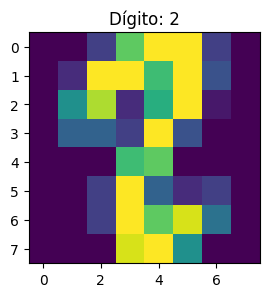

In [7]:
import matplotlib.pyplot as plt #Muestra la imagen con la librería matplotlib en este caso es 2

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.viridis)
plt.title(f'Dígito: {label}')
plt.show()

#Preprocesamiento de datos

In [8]:
import tensorflow as tf #Dividimos nuestros datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)
#Los resultados los mete a un vector
# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [9]:
print(X_train.shape)
print(X_test.shape)
#Muestra la cantidad de datos en cada conjunto


(1437, 64)
(360, 64)


In [10]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)
#8x8 para que se vea cuadrada la imagen, ya que son 64 datos

tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
# Escalar las imagenes para normalizar los pixeles, utilizando (.fit_transform) y (.transform)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [13]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

#Red neuronal convolucional

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), #imagen de 3x3
        activation='relu',
        input_shape=(8, 8, 1) #matriz de 8x8 y un canal
    ),
    MaxPooling2D(pool_size=(2, 2)), #imagen de 2x2 como cuando se usa un filtro
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') #10 porque son 10 clases
])
#relu son las capas de funcion de activacion

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
#Optimizador adam para acelerar el aprendizaje

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
#Compilamos el modelo

#Entrenamos el modelo

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=18,
    batch_size=32, #solo ocupo el 20% de los datos
    validation_split=0.2
)
#Entrenamos el modelo utilizando (.fit)
#loss/val_loss (perdida) debe tender a cero en ambas
#accuracy (precision) que se debe acercar a 1

Epoch 1/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4568 - loss: 1.9304 - val_accuracy: 0.8854 - val_loss: 0.8389
Epoch 2/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8962 - loss: 0.6489 - val_accuracy: 0.9097 - val_loss: 0.3722
Epoch 3/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9583 - loss: 0.2595 - val_accuracy: 0.9236 - val_loss: 0.2539
Epoch 4/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9735 - loss: 0.1561 - val_accuracy: 0.9444 - val_loss: 0.1921
Epoch 5/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9814 - loss: 0.1276 - val_accuracy: 0.9583 - val_loss: 0.1560
Epoch 6/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9846 - loss: 0.0770 - val_accuracy: 0.9618 - val_loss: 0.1382
Epoch 7/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9804 - loss: 0.0857 - val_accuracy: 0.9653 - val_loss: 0.1311
Epoch 8/18
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9909 - loss: 0.0522 - val_accuracy: 0.9653 - val_l

#Función de pérdida

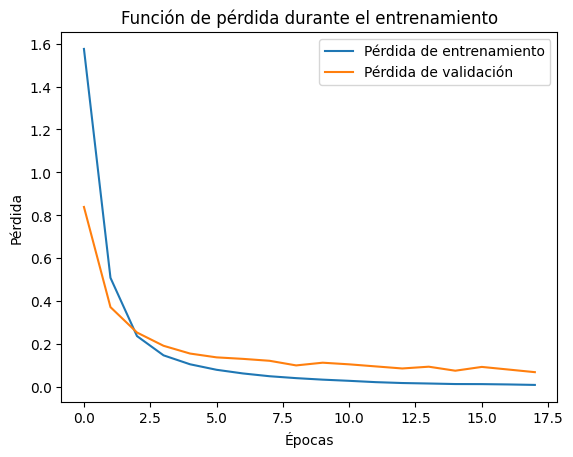

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
#Graficamos con la librería matplotlib para visualizar mejor la función de pérdida durante el entrenamiento
#La función siempre debe tender a cero para saber que el modelo funciona correctamente


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
#Evaluamos el rendimiento del modelo usando(.evaluate)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9736 - loss: 0.0604  
Loss: 0.059733495116233826, Accuracy: 0.9777777791023254


#Matriz de confusión y la sensibilidad (recall)

In [20]:
import numpy as np #Se calculan las predicciones del modelo en el conjunto de prueba y se obtienen las clases predichas.
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes) #Matriz
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None) #Sensibilidad

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Visualizar la matriz de confusión y mostrar la sensibilidad para cada clase




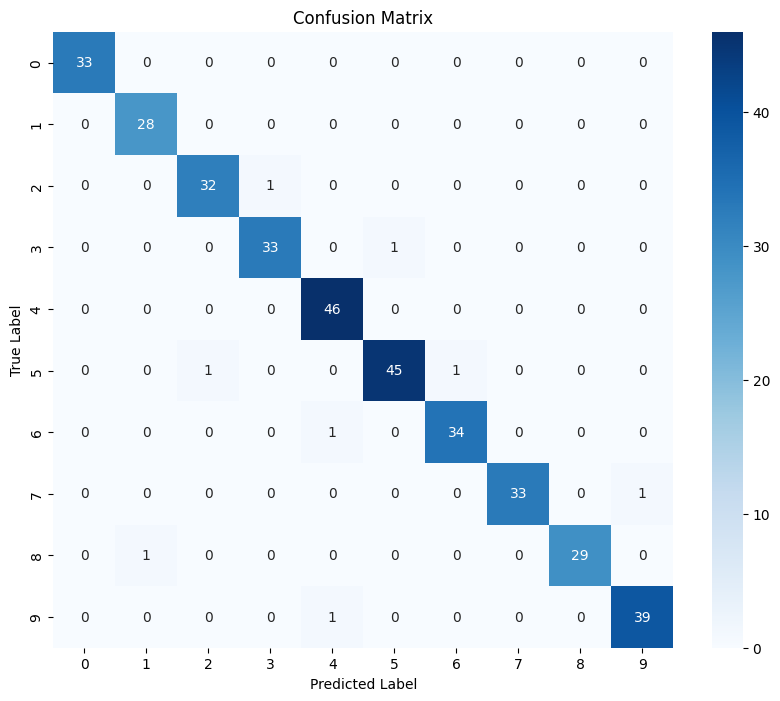

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9574468085106383
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 0.9666666666666667
Class 9: 0.975


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')
    #falsos positivos arriba y falsos negativos abajo ejemplo el 46

El recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo sobre el total de instancias positivas en el conjunto de datos. En otras palabras, el recall indica qué tan efectivo es el modelo para encontrar todas las instancias positivas en comparación con el total de instancias positivas reales en el conjunto de datos.

Un recall de 1.0 (100%) significa que el modelo identifica todas las instancias positivas correctamente, es decir, no hay falsos negativos.

Un recall de 0.0 (0%) indica que el modelo no identifica ninguna instancia positiva correctamente, es decir, todos los casos positivos son clasificados como negativos (falsos negativos).

#Bonus (Predecir una imagen distinta al conjunto de datos)

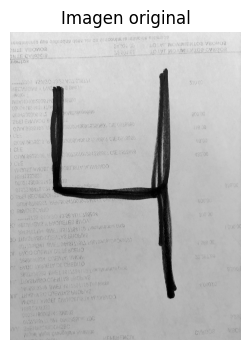

In [27]:
from PIL import Image #lee la imagen
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="grey")
plt.title("Imagen original")
plt.axis("off")
plt.show()


#Redimensionar

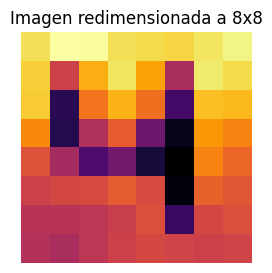

In [25]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="inferno")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


#Preprocesamiento

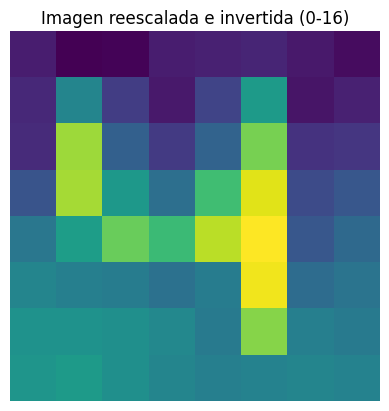

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="viridis")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


In [31]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

#Evaluación

In [32]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)
#La imagen es el número 4 y la predicción también,
#entonces el modelo si esta funcionando correctamente.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicción: 4
